In [6]:
import zipfile
import os

zip_path = "Dataset.zip"
extract_path = "/content/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

Found 400 files belonging to 4 classes.
Using 320 files for training.
Found 400 files belonging to 4 classes.
Using 80 files for validation.
Class names: ['Bus', 'Car', 'Motorcycle', 'Truck']


<ipython-input-7-59603281dec7>:50: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(input_shape=(img_height, img_width, 3),


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.4267 - loss: 1.6056 - val_accuracy: 0.8000 - val_loss: 0.4562
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7953 - loss: 0.4988 - val_accuracy: 0.8625 - val_loss: 0.3359
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9059 - loss: 0.2418 - val_accuracy: 0.9000 - val_loss: 0.2183
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8483 - loss: 0.3778 - val_accuracy: 0.9125 - val_loss: 0.2131
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.8948 - loss: 0.2705 - val_accuracy: 0.8875 - val_loss: 0.3292
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9359 - loss: 0.1700 - val_accuracy: 0.9000 - val_loss: 0.2536
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9308 - loss: 0.2418 - val_accuracy: 0.9000 - val_loss: 0.2464
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9526 

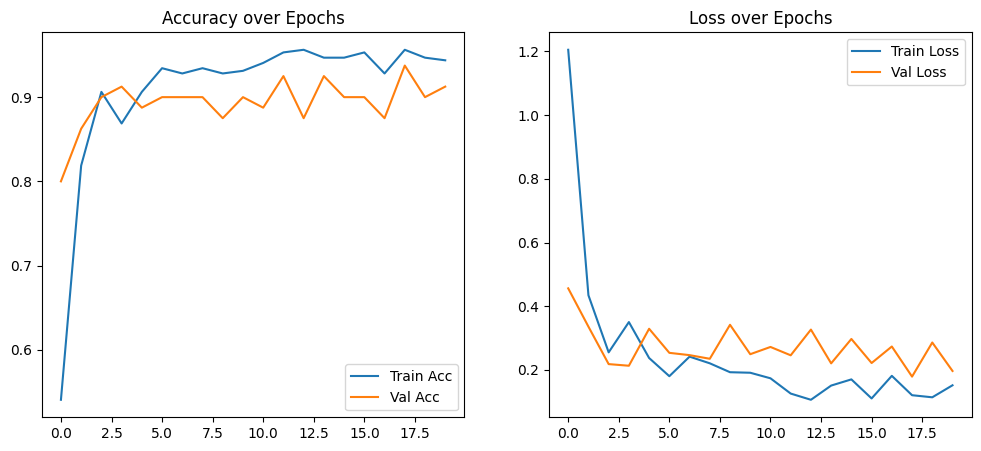

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Parameters
img_height, img_width = 180, 180
batch_size = 32
data_dir = "Dataset"

# 1. Load dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
    validation_split=0.2,
    subset="training",
    seed=123,
    label_mode='categorical'  # for multi-class
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
    validation_split=0.2,
    subset="validation",
    seed=123,
    label_mode='categorical'
)

class_names = train_ds.class_names
print("Class names:", class_names)

# 2. Optimize performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

# Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])


base_model = tf.keras.applications.MobileNetV2(input_shape=(img_height, img_width, 3),
                                                include_top=False,
                                                weights='imagenet')
base_model.trainable = False  # freeze it for now


# 3. Build the CNN model
# model = models.Sequential([
#     data_augmentation,
#     layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

#     layers.Conv2D(32, (3,3), activation='relu'),
#     layers.MaxPooling2D(),

#     layers.Conv2D(64, (3,3), activation='relu'),
#     layers.MaxPooling2D(),

#     layers.Conv2D(128, (3,3), activation='relu'),
#     layers.MaxPooling2D(),

#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(4, activation='softmax')  # 4 output classes
# ])

model = models.Sequential([
    data_augmentation,
    tf.keras.layers.Rescaling(1./255),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')  # 4 classes
])

# 4. Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 5. Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

# 6. Evaluate model
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Accuracy: {accuracy:.2f}")

# 7. Plot accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()






# import tensorflow as tf
# from tensorflow.keras import layers, models
# from sklearn.utils import class_weight
# import numpy as np
# import matplotlib.pyplot as plt

# # Parameters
# img_height, img_width = 180, 180
# batch_size = 32
# data_dir = "Dataset"

# # 1. Load dataset
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     data_dir,
#     image_size=(img_height, img_width),
#     batch_size=batch_size,
#     shuffle=True,
#     validation_split=0.2,
#     subset="training",
#     seed=123,
#     label_mode='categorical'
# )

# val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     data_dir,
#     image_size=(img_height, img_width),
#     batch_size=batch_size,
#     shuffle=True,
#     validation_split=0.2,
#     subset="validation",
#     seed=123,
#     label_mode='categorical'
# )

# class_names = train_ds.class_names
# print("Class names:", class_names)

# # 2. Optimize performance
# AUTOTUNE = tf.data.AUTOTUNE
# train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

# # 3. Data Augmentation
# data_augmentation = tf.keras.Sequential([
#     layers.RandomFlip("horizontal"),
#     layers.RandomRotation(0.1),
#     layers.RandomZoom(0.1),
#     layers.RandomContrast(0.1),
# ])

# # 4. Pretrained Base Model
# base_model = tf.keras.applications.MobileNetV2(
#     input_shape=(img_height, img_width, 3),
#     include_top=False,
#     weights='imagenet'
# )
# base_model.trainable = True

# # 5. Freeze first few layers to retain low-level features
# for layer in base_model.layers[:100]:
#     layer.trainable = False

# # 6. Build model
# model = models.Sequential([
#     data_augmentation,
#     layers.Rescaling(1./255),
#      ,
#     layers.GlobalAveragePooling2D(),
#     layers.Dropout(0.5),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(4, activation='softmax')
# ])

# # 7. Compile model with lower learning rate
# model.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )

# # 8. Calculate class weights
# y_train = np.concatenate([np.argmax(y, axis=1) for _, y in train_ds])
# class_weights = class_weight.compute_class_weight(
#     class_weight='balanced',
#     classes=np.unique(y_train),
#     y=y_train
# )
# class_weights = dict(enumerate(class_weights))

# # 9. Train model with EarlyStopping
# early_stopping = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss',
#     patience=3,
#     restore_best_weights=True
# )

# history = model.fit(
#     train_ds,
#     validation_data=val_ds,
#     epochs=20,
#     class_weight=class_weights,
#     callbacks=[early_stopping]
# )

# # 10. Evaluate model
# loss, accuracy = model.evaluate(val_ds)
# print(f"Validation Accuracy: {accuracy:.2f}")

# # 11. Plot accuracy and loss
# plt.figure(figsize=(12, 5))
# plt.subplot(1, 2, 1)
# plt.plot(history.history['accuracy'], label='Train Acc')
# plt.plot(history.history['val_accuracy'], label='Val Acc')
# plt.legend()
# plt.title('Accuracy over Epochs')

# plt.subplot(1, 2, 2)
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Val Loss')
# plt.legend()
# plt.title('Loss over Epochs')
# plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 836ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


<Figure size 800x600 with 0 Axes>

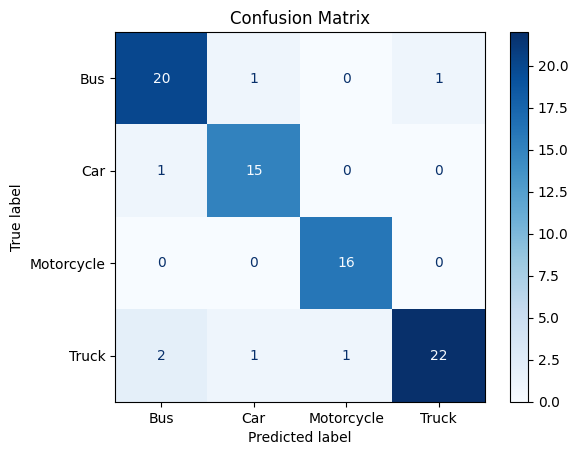

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Get true labels and predicted labels
y_true = []
y_pred = []

# Loop through validation dataset
for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [11]:
import tensorflow as tf
import numpy as np
from PIL import Image
from io import BytesIO

img = Image.open("image_test.jpg").convert("RGB")

img = img.resize((img_width, img_height))  # Resize to model input size
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0)  # Create batch dimension
img_array = img_array / 255.0  # Normalize

# Predict
predictions = model.predict(img_array)

print(predictions)


predicted_class = class_names[np.argmax(predictions[0])]
confidence = 100 * np.max(predictions[0])

print(f"Predicted class: {predicted_class} ({confidence:.2f}% confidence)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
[[0.01288593 0.7678379  0.11603455 0.10324176]]
Predicted class: Car (76.78% confidence)
